# Exploring the Accuracy of Alias Frequency Across Four Nyquist Zones
### February 6, 2026
### Olivia Wagner

# 1. Abstract
Insert abstract here

# 2. Introduction
Need to talk about
- Nyquist Sampling
- Fourier Transforms (FFT and DFT and IFT)
- Mixers

## Question
In this report, our goal is to answer the following question: how accurately does the measured alias frequency match its theoretical prediction, as the input signal frequency is compared across four Nyquist zones?

# 3. Experiment 1: Digitally Sampling a Sine Wave

## 3.1 Methods
In our first experiment, we connected a Raspberry Pi–based Software-Defined Radio (SDR) to one of the radio astronomy lab bench's function generators to study the behavior of aliasing frequencies under controlled conditions. The function generator was set up to output a sinusoidal signal with a constant amplitude of 2.5 mV, while the input frequency was systematically varied. The sampling rate of the SDR was held fixed at 1 MHz (1000 kHz); by the Nyquist sampling criterion, this corresponds to a Nyquist frequency of 500 kHz and naturally divides the frequency axis into Nyquist zones of width 500 kHz.

For this report, we analyzed four Nyquist zones (Zones 0–3), measuring three input frequencies within each zone for a total of twelve frequencies. By collecting multiple data sets across these zones, we aimed to evaluate the agreement between theoretical aliasing predictions and the experimentally measured aliased frequencies.

In Nyquist Zone 0 (0–500 kHz), we measured 150 kHz, 250 kHz, and 350 kHz, giving a wide range of high and low frequencies within the zone. All of these frequencies are below the Nyquist frequency, meaning that no aliasing is expected in Zone 0. Rather, we will use Zone 0 to compare the measured (aliased) frequencies in other Nyquist zones. Theoretically, as we sweep across each of the Nyquist zones, our data should be symmetric about the Nyquist boundaries, which are integer multiples of 500 kHz.

In Nyquist Zones 1–3 (500–1000 kHz, 1000–1500 kHz, and 1500–2000 kHz, respectively), we measured frequencies chosen to correspond directly to those measured in Zone 0. Specifically, in Zone 1, we measured 650 kHz, 750 kHz, and 850 kHz; in Zone 2, 1150 kHz, 1250 kHz, and 1350 kHz; in Zone 3, 1650 kHz, 1750 kHz, and 1850 kHz. Each set of frequencies occupies the same relative position, within its respective Nyquist zone, as the reference frequencies in Zone 0. This allows us to directly compare how signals at symmetrically identical positions within each Nyquist zone are aliased into the baseband (-500 kHz–500 kHz), and to evaluate whether the observed aliasing behavior matches theoretical predictions.

### Importing all the packages

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal 
from scipy.signal import correlate, correlation_lags

# My super awesome and cool package

### Importing the data from the four Nyquist zones

In [18]:
# ———————————————————— Nyquist Zone 0 ————————————————————
with np.load("Z0_150kHz.npz") as data: # 150 kHz
    # print(data.files)
    Z0_150 = data['arr_0']
    # print(Z0_150)
    
with np.load("Z0_250kHz.npz") as data: # 250 kHz
    # print(data.files)
    Z0_250 = data['arr_0']
    # print(Z0_250)

with np.load("Z0_350kHz.npz") as data: # 350 kHz
    # print(data.files)
    Z0_350 = data['arr_0']
    # print(Z0_350)


# ———————————————————— Nyquist Zone 1 ————————————————————
with np.load("Z1_650kHz.npz") as data: # 650 kHz
    # print(data.files)
    Z1_650 = data['arr_0']
    # print(Z1_650)
    
with np.load("Z1_750kHz.npz") as data: # 750 kHz
    # print(data.files)
    Z1_750 = data['arr_0']
    # print(Z1_750)

with np.load("Z1_850kHz.npz") as data: # 850 kHz
    # print(data.files)
    Z1_850 = data['arr_0']
    # print(Z1_850)


# ———————————————————— Nyquist Zone 2 ————————————————————
with np.load("Z2_1150kHz.npz") as data: # 1150 kHz
    # print(data.files)
    Z2_1150 = data['arr_0']
    # print(Z2_1150)
    
with np.load("Z2_1250kHz.npz") as data: # 1250 kHz
    # print(data.files)
    Z2_1250 = data['arr_0']
    # print(Z2_1250)

with np.load("Z2_1350kHz.npz") as data: # 1350 kHz
    # print(data.files)
    Z2_1350 = data['arr_0']
    # print(Z2_1350)


# ———————————————————— Nyquist Zone 3 ————————————————————
with np.load("Z3_1650kHz.npz") as data: # 1650 kHz
    # print(data.files)
    Z3_1650 = data['arr_0']
    # print(Z3_1650)
    
with np.load("Z3_1750kHz.npz") as data: # 1750 kHz
    # print(data.files)
    Z3_1750 = data['arr_0']
    # print(Z3_1750)

with np.load("Z3_1850kHz.npz") as data: # 1850 kHz
    # print(data.files)
    Z3_1850 = data['arr_0']
    # print(Z3_1850)

### Digital Sampling and the Nyquist Criterion

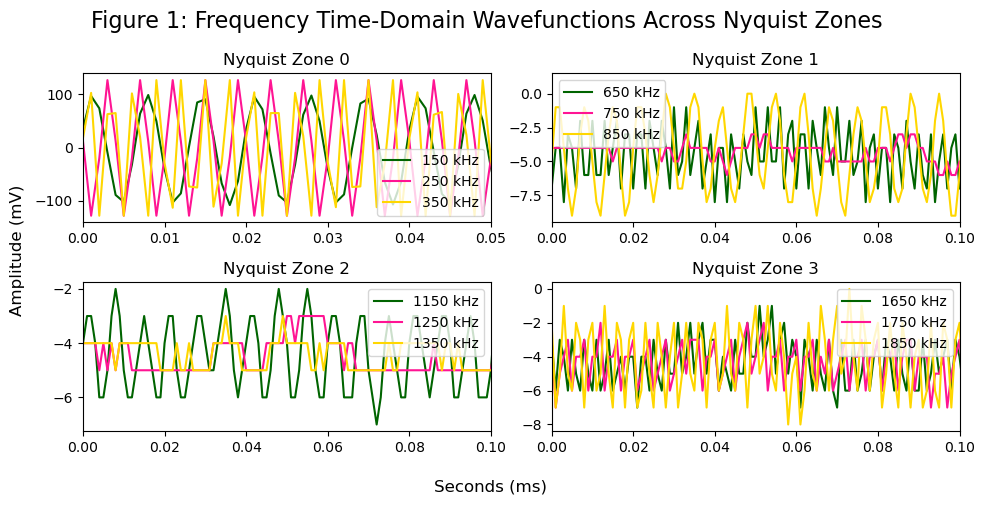

In [96]:
# Sample Rate to Time Conversion Function
def N2time(v, N): # Takes the length of the array for each sample rate and divides it by the sampling rate, giving time
    return np.arange(N) / v

# Sample Rate Conversion for each time
sample_rate = 1.0e6
t_Z0_150 = N2time(sample_rate, len(Z0_150[1]))
t_Z0_250 = N2time(sample_rate, len(Z0_250[1]))
t_Z0_350 = N2time(sample_rate, len(Z0_350[1]))

t_Z1_650 = N2time(sample_rate, len(Z1_650[1]))
t_Z1_750 = N2time(sample_rate, len(Z1_750[1]))
t_Z1_850 = N2time(sample_rate, len(Z1_850[1]))

t_Z2_1150 = N2time(sample_rate, len(Z2_1150[1]))
t_Z2_1250 = N2time(sample_rate, len(Z2_1250[1]))
t_Z2_1350 = N2time(sample_rate, len(Z2_1350[1]))

t_Z3_1650 = N2time(sample_rate, len(Z3_1650[1]))
t_Z3_1750 = N2time(sample_rate, len(Z3_1750[1]))
t_Z3_1850 = N2time(sample_rate, len(Z3_1850[1]))


# ———————————————————— Amplitude vs. Time Plot ————————————————————
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharey=False, sharex=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(t_Z0_150*1000, # Converting to the correct units of time, milliseconds
         Z0_150[1], color='darkgreen', label="150 kHz")
ax.plot(t_Z0_250*1000, Z0_250[1], color='deeppink', label="250 kHz")
ax.plot(t_Z0_350*1000, Z0_350[1], color='gold', label="350 kHz")
ax.set_title('Nyquist Zone 0')
ax.legend()
ax.set_xlim(0, 0.05)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(t_Z1_650*1000, Z1_650[1], color='darkgreen', label="650 kHz")
ax.plot(t_Z1_750*1000, Z1_750[1], color='deeppink', label="750 kHz")
ax.plot(t_Z1_850*1000, Z1_850[1], color='gold', label="850 kHz")
ax.set_title('Nyquist Zone 1')
ax.legend()
ax.set_xlim(0, 0.10)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(t_Z2_1150*1000, Z2_1150[1], color='darkgreen', label="1150 kHz")
ax.plot(t_Z2_1250*1000, Z2_1250[1], color='deeppink', label="1250 kHz")
ax.plot(t_Z2_1350*1000, Z2_1350[1], color='gold', label="1350 kHz")
ax.set_title('Nyquist Zone 2')
ax.legend()
ax.set_xlim(0, 0.10)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(t_Z3_1650*1000, Z3_1650[1], color='darkgreen', label="1650 kHz")
ax.plot(t_Z3_1750*1000, Z3_1750[1], color='deeppink', label="1750 kHz")
ax.plot(t_Z3_1850*1000, Z3_1850[1], color='gold', label="1850 kHz")
ax.set_title('Nyquist Zone 3')
ax.legend()
ax.set_xlim(0, 0.10)

fig.supxlabel('Seconds (ms)')
fig.supylabel('Amplitude (mV)')
fig.suptitle('Figure 1: Frequency Time-Domain Wavefunctions Across Nyquist Zones ', fontsize=16)
plt.tight_layout()
fig.subplots_adjust(hspace=0.4)

Figure 1: The measured frequencies across Nyquist zones are plotted as amplitude (mV) versus time (ms). In Nyquist Zone 0, the frequencies demonstrate sinusoidal patterns with relatively large and consistent amplitudes. Due to these larger amplitudes, the time axis is zoomed in, from 0.10 milliseconds to 0.05 milliseconds, to more clearly illustrate the sinusoidal behavior. In contrast, the amplitudes decrease significantly in subsequent Nyquist zones. 

(Come back to later) This discrepancy arises because the SDR’s analog front end does not have a flat frequency response. As the input frequency increases, the signal is increasingly attenuated by analog components such as bandpass and anti-alias filters before digitization. Although these higher-frequency signals still alias into baseband, their effective amplitude is reduced. Additionally, the lower signal-to-noise ratio at higher frequencies causes the waveforms to appear noisier and further suppresses the measured amplitude.

### Voltage Spectra and Power Spectra

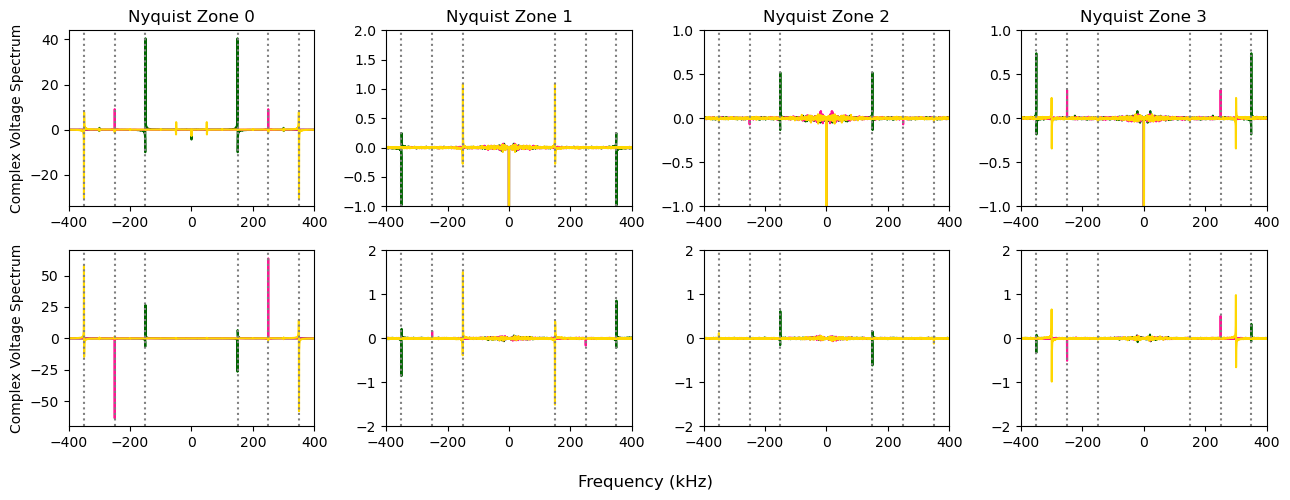

In [155]:
# ———————————————————— Complex Voltage Spectra ————————————————————

fig, axes = plt.subplots(2, 4, figsize=(13, 5), sharey=False, sharex=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, np.real((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen')
ax.plot(Shift_freq250 / 1e3, np.real((Shift_Xf_250) / len(Z0_250[1])), color='deeppink')
ax.plot(Shift_freq350 / 1e3, np.real((Shift_Xf_350) / len(Z0_350[1])), color='gold')
ax.set_title('Nyquist Zone 0')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylabel('Complex Voltage Spectrum')

ax = axes[1, 0]
ax.plot(Shift_freq150 / 1e3, np.imag((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen')
ax.plot(Shift_freq250 / 1e3, np.imag((Shift_Xf_250) / len(Z0_250[1])), color='deeppink')
ax.plot(Shift_freq350 / 1e3, np.imag((Shift_Xf_350) / len(Z0_350[1])), color='gold')
# ax.set_title('Nyquist Zone 0')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylabel('Complex Voltage Spectrum')

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, np.real((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen')
ax.plot(Shift_freq750 / 1e3, np.real((Shift_Xf_750) / len(Z1_750[1])), color='deeppink')
ax.plot(Shift_freq850 / 1e3, np.real((Shift_Xf_850) / len(Z1_850[1])), color='gold')
ax.set_title('Nyquist Zone 1')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylim(-1, 2)

ax = axes[1, 1]
ax.plot(Shift_freq650 / 1e3, np.imag((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen')
ax.plot(Shift_freq750 / 1e3, np.imag((Shift_Xf_750) / len(Z1_750[1])), color='deeppink')
ax.plot(Shift_freq850 / 1e3, np.imag((Shift_Xf_850) / len(Z1_850[1])), color='gold')
# ax.set_title('Nyquist Zone 1')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylim(-2, 2)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[0, 2]
ax.plot(Shift_freq1150 / 1e3, np.real((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen')
ax.plot(Shift_freq1250 / 1e3, np.real((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink')
ax.plot(Shift_freq1350 / 1e3, np.real((Shift_Xf_1350) / len(Z2_1350[1])), color='gold')
ax.set_title('Nyquist Zone 2')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylim(-1, 1)

ax = axes[1, 2]
ax.plot(Shift_freq1150 / 1e3, np.imag((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen')
ax.plot(Shift_freq1250 / 1e3, np.imag((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink')
ax.plot(Shift_freq1350 / 1e3, np.imag((Shift_Xf_1350) / len(Z2_1350[1])), color='gold')
# ax.set_title('Nyquist Zone 2')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylim(-2, 2)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[0, 3]
ax.plot(Shift_freq1650 / 1e3, np.real((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen')
ax.plot(Shift_freq1750 / 1e3, np.real((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink')
ax.plot(Shift_freq1850 / 1e3, np.real((Shift_Xf_1850) / len(Z3_1850[1])), color='gold')
ax.set_title('Nyquist Zone 3')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylim(-1, 1)

ax = axes[1, 3]
ax.plot(Shift_freq1650 / 1e3, np.imag((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen')
ax.plot(Shift_freq1750 / 1e3, np.imag((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink')
ax.plot(Shift_freq1850 / 1e3, np.imag((Shift_Xf_1850) / len(Z3_1850[1])), color='gold')
# ax.set_title('Nyquist Zone 3')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlim(-400, 400)
ax.set_ylim(-2, 2)

fig.supxlabel('Frequency (kHz)')
# fig.supylabel('Power (|V(f)|²)')
fig.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

Figure 3: discussing what the real and imaginary parts of the spectra represent

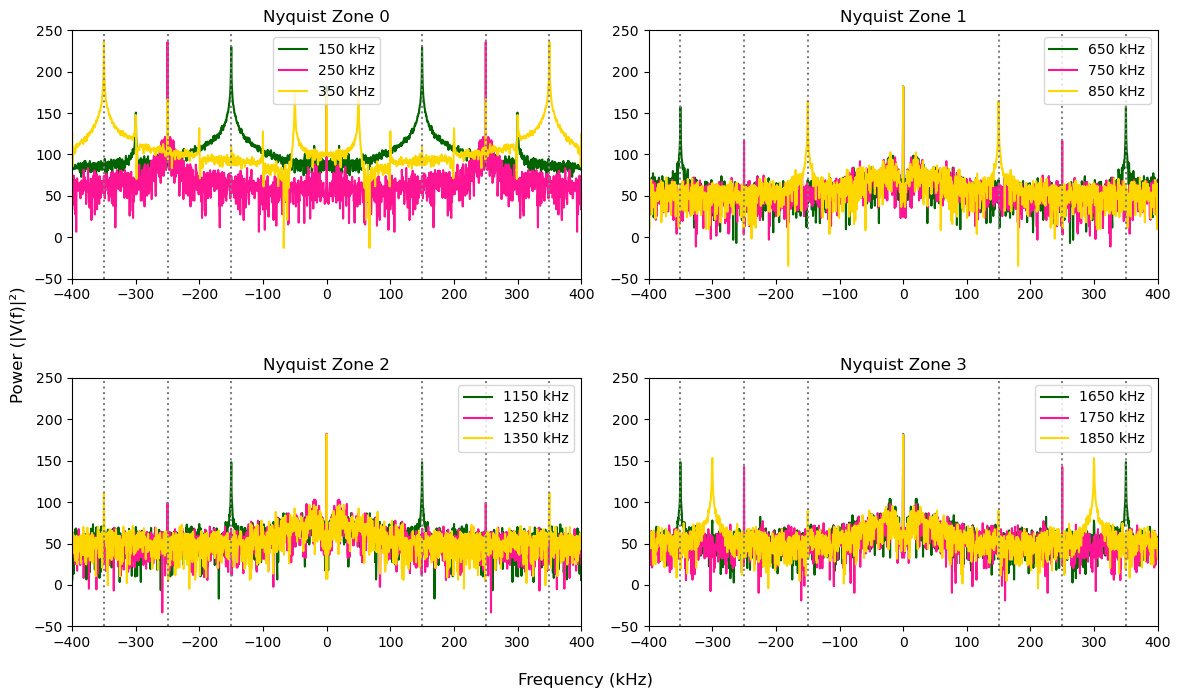

In [49]:
# ———————————————————— Power Spectra ————————————————————

# Computing power, the magnitude squared of each frequency bin
Shift_P_150  = np.abs(Shift_Xf_150)**2
Shift_P_250  = np.abs(Shift_Xf_250)**2
Shift_P_350  = np.abs(Shift_Xf_350)**2

Shift_P_650  = np.abs(Shift_Xf_650)**2
Shift_P_750  = np.abs(Shift_Xf_750)**2
Shift_P_850  = np.abs(Shift_Xf_850)**2

Shift_P_1150 = np.abs(Shift_Xf_1150)**2
Shift_P_1250 = np.abs(Shift_Xf_1250)**2
Shift_P_1350 = np.abs(Shift_Xf_1350)**2

Shift_P_1650 = np.abs(Shift_Xf_1650)**2
Shift_P_1750 = np.abs(Shift_Xf_1750)**2
Shift_P_1850 = np.abs(Shift_Xf_1850)**2


fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, 10*np.log(Shift_P_150), color='darkgreen', label='150 kHz')
ax.plot(Shift_freq250 / 1e3, 10*np.log(Shift_P_250), color='deeppink', label='250 kHz')
ax.plot(Shift_freq350 / 1e3, 10*np.log(Shift_P_350), color='gold', label='350 kHz')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend()

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, 10*np.log(Shift_P_650), color='darkgreen', label='650 kHz')
ax.plot(Shift_freq750 / 1e3, 10*np.log(Shift_P_750), color='deeppink', label='750 kHz')
ax.plot(Shift_freq850 / 1e3, 10*np.log(Shift_P_850), color='gold', label='850 kHz')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend()

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Shift_freq1150 / 1e3, 10*np.log(Shift_P_1150), color='darkgreen', label='1150 kHz')
ax.plot(Shift_freq1250 / 1e3, 10*np.log(Shift_P_1250), color='deeppink', label='1250 kHz')
ax.plot(Shift_freq1350 / 1e3, 10*np.log(Shift_P_1350), color='gold', label='1350 kHz')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend()

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Shift_freq1650 / 1e3, 10*np.log(Shift_P_1650), color='darkgreen', label='1650 kHz')
ax.plot(Shift_freq1750 / 1e3, 10*np.log(Shift_P_1750), color='deeppink', label='1750 kHz')
ax.plot(Shift_freq1850 / 1e3, 10*np.log(Shift_P_1850), color='gold', label='1850 kHz')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.legend()

fig.supxlabel('Frequency (kHz)')
fig.supylabel('Power (|V(f)|²)')
plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

Figure 4: Power spectra of the twelve measured input frequencies across Nyquist Zones 0–3. Each subplot shows three input frequencies within the corresponding Nyquist zone. The grey dotted vertical lines indicate the theoretically predicted aliased frequencies based on the sampling rate and Nyquist frequency. In Nyquist Zones 1 and 2, the measured spectral peaks align closely with the expected alias locations. Additionally, the transition from Zone 0 to Zone 1 demonstrates spectral inversion due to aliasing. For example, looking at the upper right subplot titled 'Nyquist Zone 1', an input frequency of 650 kHz (dark green) aliases to a measured peak at 350 kHz. Due to the nature of Nyquist zones, this behavior is expected.

Now, looking at 'Nyquist Zone 3', we see a diversion from the expected aliased frequencies. The yellow peak, corresponding to a frequency of 1850 kHz, does have a small peak at the expected value of 150 kHz; however, its strongest peak is at 300 kHz. In the next section, on aata analysis, we explore potential reasons for this discrepancy, as well as differences in peak amplitudes between zones, most notably the SDR's anti-aliasing filter.

# 3 Data Analysis

Insert data analysis here

This is likely due to the SDR’s analog front-end filtering and reduced gain at higher frequencies, which attenuate signals in higher Nyquist zones before digitization. As a result, non-ideal effects such as spectral leakage or hardware nonlinearities become more prominent, leading to discrepancies from the ideal aliasing predictions.


# 4 Interpretation

Insert interpretation here

# 5 Conclusion

Insert conclusion here

# 6 References

Insert references here